<a href="https://colab.research.google.com/github/Mehadi4021/Digital-Image-Processing_Lab_CSE438/blob/main/Experiment_No7_DIP_Lab_Day_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

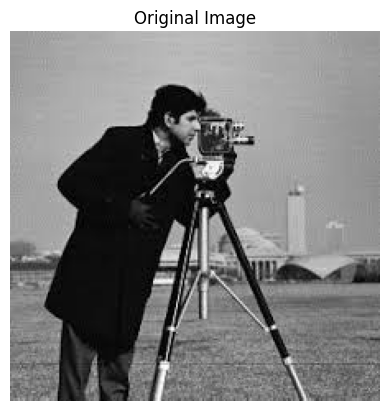

In [ ]:
# Load an image (change 'image.jpg' to your own image path if needed)
image = cv2.imread('/content/drive/MyDrive/DIP_Lab/Day_7/man_with_camera.jpg')  # Load image in BGR format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

# Show the original image
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

#  Image Convolution (Manual Implementation)



## 🔍 What is Image Convolution?

**Convolution** is a fundamental operation in image processing where we slide a small matrix (called a **kernel** or **filter**) over the image to extract or enhance features like **edges**, **blur**, **sharpening**, etc.

Imagine laying a small window (like 3×3) on top of your image, multiplying it with the overlapping image pixels, summing them, and replacing the center pixel with that result.

---

## ⚙️ Manual Convolution Function: `apply_convolution(image, kernel)`

### Let's go through the function line by line:

```python
def apply_convolution(image, kernel):
```
- **Function definition**: Takes an RGB image and a 2D kernel as input.

---

```python
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
```
- **Convert RGB to grayscale**: Convolution is generally done on a single channel, so we convert the color image to grayscale.

---

```python
    h, w = gray.shape
```
- **Get image height and width**: Needed to loop through all pixels.

---

```python
    kh, kw = kernel.shape
    pad = kh // 2
```
- **Get kernel size** (assuming square kernel).
- **Compute padding**: If kernel is 3×3, we need to pad by 1 pixel on all sides to keep the output image size same as input.

---

```python
    padded_image = np.pad(gray, pad, mode='constant', constant_values=0)
```
- **Zero-padding**: Adds a border of zeros around the image to ensure that convolution works at the edges.

---

```python
    output = np.zeros_like(gray)
```
- **Prepare an output image** with the same size as the original grayscale image.

---

```python
    for i in range(h):
        for j in range(w):
```
- **Loop through every pixel** in the image (excluding padding).

---

```python
            region = padded_image[i:i+kh, j:j+kw]
```
- **Extract the region of interest (ROI)** the size of the kernel.

---

```python
            output[i, j] = np.sum(region * kernel)
```
- **Element-wise multiplication** between the region and kernel.
- **Sum all the results** and place it in the output image.

---

```python
    return output
```
- Finally, the processed image is returned.

---

## 📌 Visual Analogy:

- Original grayscale image:
  ```
  [  10   20   30 ]
  [  40   50   60 ]
  [  70   80   90 ]
  ```
- Kernel (e.g., averaging filter):
  ```
  [1/9 1/9 1/9]
  [1/9 1/9 1/9]
  [1/9 1/9 1/9]
  ```
- Center pixel (50) becomes:  
  `(10 + 20 + ... + 90) / 9` → **Mean of surrounding values**

---

## ✅ Why do we implement it manually?

- To understand **how convolution actually works under the hood**.
- Built-in functions like `cv2.filter2D()` do the same thing but are optimized.
- Manual implementation is great for **learning and customizing kernels**.



## 🧱 What is Padding?

**Padding** means **adding extra rows and columns** (usually of zeros or repeated values) **around the border of an image** so that you can apply filters (kernels) to **every pixel**, even those at the edges.

### 🖼️ Why is it needed?

Let’s say you have a **3×3 filter** (kernel) that needs a center pixel and its 8 neighbors.  
But what about the pixels at the **edges or corners** of an image?

- **Without padding**, the filter **can’t center on edge pixels** — you’d lose rows and columns after filtering.
- **With padding**, you can **preserve the original image size** and still apply filters everywhere.

---

## 📐 Types of Padding

| Type         | Description |
|--------------|-------------|
| `cv2.BORDER_CONSTANT` | Pads with a constant value (e.g., 0) |
| `cv2.BORDER_REPLICATE` | Repeats the edge values |
| `cv2.BORDER_REFLECT`   | Reflects pixels like a mirror |
| `cv2.BORDER_REFLECT_101` | Mirror but avoids repeating the edge pixel |
| `cv2.BORDER_DEFAULT`  | Usually same as `REFLECT_101` |
| `cv2.BORDER_ISOLATED` | Doesn't consider pixels outside ROI |

---

### 🔧 Example in OpenCV

When you apply convolution with `cv2.filter2D`, OpenCV uses **default border type** (`cv2.BORDER_DEFAULT`), unless you specify otherwise:

```python
# Apply custom convolution with padding
custom_blur = cv2.filter2D(src=image, ddepth=-1, kernel=kernel, borderType=cv2.BORDER_CONSTANT)
```

---

## 🧮 Padding and Output Size

For a `k x k` kernel:
- **Padding = floor(k / 2)** on each side ensures that **output size = input size**

### Example:
If image is 5×5 and filter is 3×3:
- Padding = 1 → New image size = 7×7 (for calculation)
- Output image after convolution stays 5×5

---

## 🔍 Visual Representation

```text
Original image (5×5):

[ 1  2  3  4  5 ]
[ 6  7  8  9 10 ]
[11 12 13 14 15 ]
[16 17 18 19 20 ]
[21 22 23 24 25 ]

Zero padding (3×3 kernel needs 1 pixel pad):

[ 0  0  0  0  0  0  0 ]
[ 0  1  2  3  4  5  0 ]
[ 0  6  7  8  9 10  0 ]
[ 0 11 12 13 14 15  0 ]
[ 0 16 17 18 19 20  0 ]
[ 0 21 22 23 24 25  0 ]
[ 0  0  0  0  0  0  0 ]
```



In [ ]:
def apply_convolution(image, kernel):
    # Convert to grayscale for convolution
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Get image dimensions
    h, w = gray.shape

    # Get kernel size
    kh, kw = kernel.shape
    pad = kh // 2  # Padding needed to keep image size same

    # Pad the image
    padded_image = np.pad(gray, pad, mode='constant', constant_values=0)

    # Output image
    output = np.zeros_like(gray)

    # Perform convolution
    for i in range(h):
        for j in range(w):
            # Extract region of interest
            region = padded_image[i:i+kh, j:j+kw]
            # Element-wise multiplication and summation
            output[i, j] = np.sum(region * kernel)

    return output


# Smoothing (Blurring) using Averaging Filter

Absolutely! Let's deep dive into **Smoothing (Blurring) using an Averaging Filter** — one of the most basic and widely used techniques in Digital Image Processing (DIP).

---

## 🧼 What is Smoothing (Blurring)?

**Smoothing** or **blurring** refers to reducing the sharpness or detail in an image. It helps in:

- Removing **noise** (especially random variations in pixel values)
- Reducing **fine texture**
- Helping with **edge detection**, **segmentation**, and **thresholding** by preprocessing the image

---

## 🧠 Concept of Averaging Filter

An **Averaging Filter** is a **linear filter**. It works by:

- Taking a **small window (kernel)** of fixed size (e.g., 3×3, 5×5)
- **Averaging** the pixel values in that window
- Replacing the **center pixel** with this average value

This process is repeated **for every pixel** in the image (except edges, unless padded).

### 🎯 Result:
It smooths transitions and **removes noise**, but can also **blur edges and details**.

---

## 📏 How It Works – Example (3x3 kernel)

Let’s take a tiny part of an image:
```
| 30  40  50 |
| 20 100  60 |  ← kernel center at 100
| 90  80  70 |
```

**Average = (30 + 40 + 50 + 20 + 100 + 60 + 90 + 80 + 70) / 9 = 60**

🔁 Replace 100 with 60 — the **average of its neighbors**.

---

## 🧮 Kernel Representation

Averaging Filter kernel for 3×3:

```text
[1/9 1/9 1/9]
[1/9 1/9 1/9]
[1/9 1/9 1/9]
```

For 5×5, all values are `1/25`, and so on.


## 📉 Pros and Cons

| ✅ Pros                     | ❌ Cons                            |
|----------------------------|------------------------------------|
| Easy to implement          | Blurs important details and edges |
| Reduces random noise       | Not edge-preserving                |
| Computationally efficient  | Not suitable for all types of noise |

---

## 💡 Real-World Use Cases

- **Preprocessing** before edge detection (like Canny)
- Removing **Gaussian noise**
- Smoothing **scanned documents**
- Preparing images for **thresholding or segmentation**


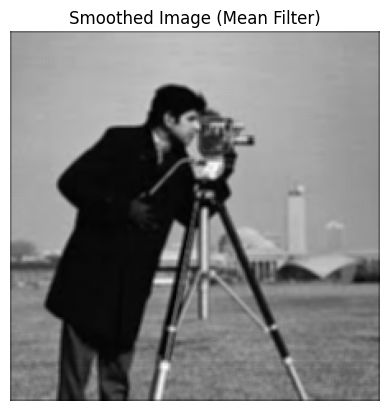

In [ ]:
# Define a 3x3 averaging kernel
avg_kernel = np.ones((3, 3), np.float32) / 9

# Apply convolution
smoothed_image = apply_convolution(image, avg_kernel)

# Display the smoothed image
plt.imshow(smoothed_image, cmap='gray')
plt.title("Smoothed Image (Mean Filter)")
plt.axis('off')
plt.show()



## 🧠 Gaussian Blur Concept

Unlike averaging, a **Gaussian filter** applies a **weighted average**, where:
- Pixels **closer to the center** have **higher weight**
- Farther ones contribute less

This **preserves edges better** and is **more effective** for removing **Gaussian noise**.

---

### 🧮 Kernel Explained

```text
[1 2 1]
[2 4 2]   ← Gaussian weight matrix (3x3)
[1 2 1]
```

- Center pixel (4) has the **highest importance**
- Neighbors contribute less
- Sum = 16 → so we divide by 16 to normalize

---

## 🔄 Summary of Key Differences

| Feature               | Mean Filter         | Gaussian Filter       |
|-----------------------|---------------------|------------------------|
| Weights               | Equal               | Center-weighted       |
| Edge preservation     | Poor                | Better                |
| Handles Gaussian Noise| Moderate            | Best                  |

---


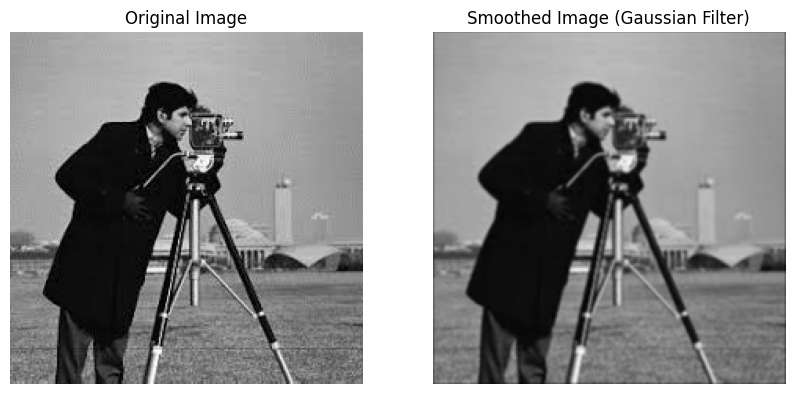

In [ ]:
# Define a 3x3 Gaussian kernel (manually)
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], np.float32)

# Normalize the kernel
gaussian_kernel /= 16.0

# Apply Gaussian convolution
smoothed_image = apply_convolution(image, gaussian_kernel)

# Display the smoothed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB))
plt.title("Smoothed Image (Gaussian Filter)")
plt.axis('off')
plt.show()



## 🌟 What is Median Blurring?

Instead of averaging or weighting pixel values like in mean or Gaussian filters, **Median Blur** replaces each pixel with the **median of its neighboring pixels**.

This helps to:
- Remove noise **without blurring edges**
- Smooth sharp pixel changes (like isolated black or white dots)

---

### 🧪 Example:

If your 3x3 neighborhood is:
```
[ 10, 200, 12 ]
[ 13, 255, 11 ]
[ 14,  13, 15 ]
```

- Sorted values: [10, 11, 12, 13, 13, 14, 15, 200, 255]
- **Median = 13**

So, the central pixel (255) is replaced with 13.

---

## 📊 Comparison Summary

| Filter         | Smoothness | Edge Preservation | Noise Removal |
|----------------|------------|-------------------|----------------|
| Mean Filter    | Moderate   | Poor              | Low (uniform noise) |
| Gaussian Filter| Good       | Better            | Good (Gaussian noise) |
| Median Filter  | Best       | Excellent         | Best (Salt & Pepper noise) |

---


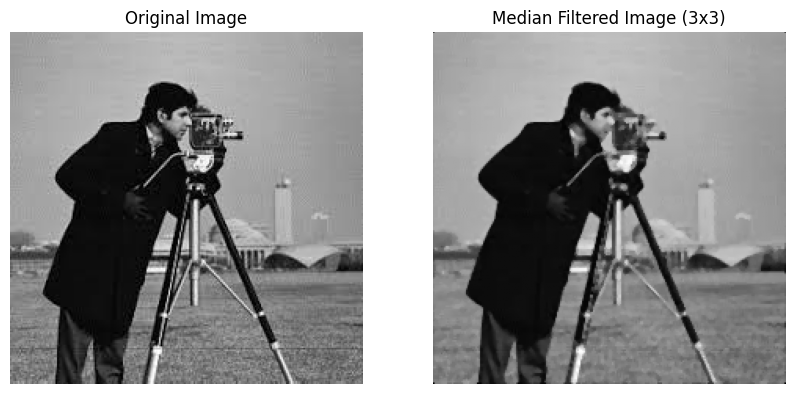

In [ ]:

# Define a function to apply manual median filter
def apply_median_filter(image, kernel_size):
    # Convert to grayscale for median filter (works on a single channel)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Get image dimensions
    h, w = gray.shape

    # Calculate padding required for the kernel
    pad = kernel_size // 2  # Padding to keep the image size the same

    # Pad the image with zeros
    padded_image = np.pad(gray, pad, mode='constant', constant_values=0)

    # Output image (to store the result)
    output = np.zeros_like(gray)

    # Perform median filter
    for i in range(h):
        for j in range(w):
            # Extract region of interest (ROI) around the pixel
            region = padded_image[i:i+kernel_size, j:j+kernel_size]

            # Compute the median of the region
            output[i, j] = np.median(region)

    return output

# Load your image (substitute 'image' with the image variable you are using)
# Example: image = cv2.imread('image.jpg')

# Define the kernel size (3x3)
kernel_size = 3

# Apply median filter to the image
median_filtered_image = apply_median_filter(image, kernel_size)

# Display the original and median filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title("Median Filtered Image (3x3)")
plt.axis('off')
plt.show()


# In Built Image convolution

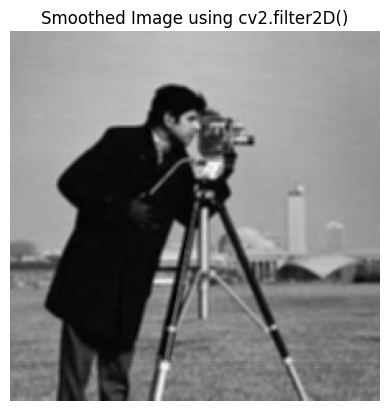

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define a 3x3 averaging kernel
avg_kernel = np.ones((3, 3), np.float32) / 9

# Apply convolution using OpenCV
smoothed = cv2.filter2D(gray, -1, avg_kernel)

# Display the result
plt.imshow(smoothed, cmap='gray')
plt.title("Smoothed Image using cv2.filter2D()")
plt.axis('off')
plt.show()



## 🧠 What is Smoothing?

Smoothing is a technique used to **reduce high-frequency content**, such as noise or fine detail, in an image. It’s commonly used in:
- **Pre-processing** before applying computer vision algorithms
- **Noise reduction**
- **Removing small texture patterns**
- **Making images less harsh or pixelated**

---

## 📦 Common Smoothing Techniques:

There are three classic filters in OpenCV for smoothing:
1. **Averaging Filter (`cv2.blur`)**
2. **Gaussian Filter (`cv2.GaussianBlur`)**
3. **Median Filter (`cv2.medianBlur`)**

---

### 1️⃣ **Averaging Filter (`cv2.blur`)**

```python
avg_blur = cv2.blur(image, (5, 5))
```

#### ✅ How it works:
- Takes a `5x5` kernel and slides it across the image.
- Each pixel is replaced with the **average** of its neighboring pixels.

#### 📌 Pros:
- Simple and fast.

#### ❌ Cons:
- Tends to **blur edges** as well as noise (less edge-preserving).

---

### 2️⃣ **Gaussian Filter (`cv2.GaussianBlur`)**

```python
gauss_blur = cv2.GaussianBlur(image, (5, 5), 0)
```

#### ✅ How it works:
- Uses a **Gaussian kernel** where pixels near the center have **higher weights**.
- Produces more natural-looking blur.
- The third parameter (`sigmaX=0`) lets OpenCV calculate the standard deviation automatically.

#### 📌 Pros:
- **Better at preserving edges** than simple averaging.
- Common in image pipelines and computer vision tasks.

---

### 3️⃣ **Median Filter (`cv2.medianBlur`)**

```python
median_blur = cv2.medianBlur(image, 5)
```

#### ✅ How it works:
- Each pixel is replaced with the **median value** from the surrounding kernel window (e.g., 5×5).
- Excellent at removing **"salt-and-pepper" noise**.

#### 📌 Pros:
- Best for **removing speckle or impulse noise** while preserving edges.
- Non-linear and more robust against outliers.

---

## 🎨 Visualizing the Difference

You typically use the following code block to **compare them side by side**:

```python
titles = ['Original', 'Averaging', 'Gaussian', 'Median']
images = [image, avg_blur, gauss_blur, median_blur]

plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
```

---

## 🔍 Summary Table

| Filter         | Replaces Pixel With | Best Use Case                   | Preserves Edges? |
|----------------|---------------------|----------------------------------|------------------|
| Averaging      | Mean of neighbors   | Basic blur, fast smoothing       | ❌ No            |
| Gaussian       | Weighted mean       | General-purpose, natural blur    | ✅ Yes           |
| Median         | Median value        | Removing salt & pepper noise     | ✅ Yes           |

---

## 🛠️ Application Examples:
- **Medical imaging**: Reduce grainy noise in X-rays, MRIs.
- **Webcams**: Denoise images before applying face detection.
- **Artistic**: Create stylized blurred backgrounds (like portrait mode).



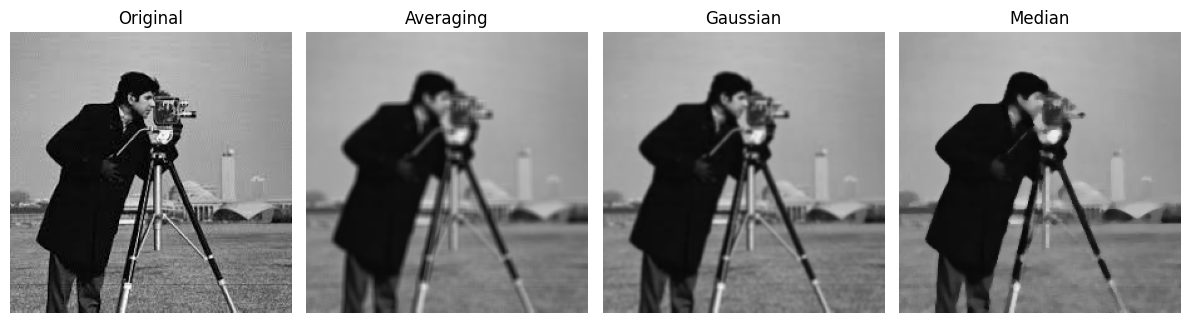

In [ ]:
avg_blur = cv2.blur(image, (5, 5))
gauss_blur = cv2.GaussianBlur(image, (5, 5), 0)
median_blur = cv2.medianBlur(image, 5)
titles = ['Original', 'Averaging', 'Gaussian', 'Median']
images = [image, avg_blur, gauss_blur, median_blur]

plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


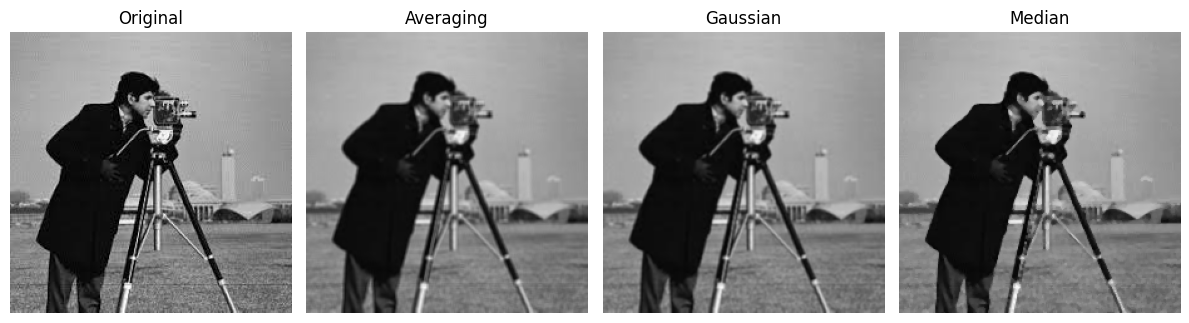

In [ ]:
avg_blur = cv2.blur(image, (3, 3))
gauss_blur = cv2.GaussianBlur(image, (3, 3), 0)
median_blur = cv2.medianBlur(image, 3)
titles = ['Original', 'Averaging', 'Gaussian', 'Median']
images = [image, avg_blur, gauss_blur, median_blur]

plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

The choice between using a **3x3** or **5x5** kernel depends on the following factors:


### When to Choose 3x3 or 5x5:

- **Choose 3x3** if:
   - The noise is **mild** (e.g., small salt-and-pepper noise).
   - You want to preserve more **edge details**.
   - You want faster computation.

- **Choose 5x5** if:
   - The noise is **moderate to severe**.
   - You're willing to sacrifice some edge sharpness for more **effective noise removal**.
   - You need more **smoothing**.

---

### A Good Approach:
- **Start with a 3x3 kernel** and observe the results.
- If the noise persists or you notice some residual roughness, try **increasing the kernel size to 5x5**.

---


# Add synthetic noise and then compare blurring filters

Awesome! Let's go ahead and:

1. **Add synthetic noise** to an image (we’ll use salt-and-pepper noise).
2. Apply the three smoothing filters:
   - Averaging (`cv2.blur`)
   - Gaussian (`cv2.GaussianBlur`)
   - Median (`cv2.medianBlur`)
3. Compare results side by side with detailed explanation.

---

## 🧪 1. Add Salt-and-Pepper Noise

```python
def add_salt_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy = np.copy(image)
    total_pixels = image.size // 3

    # Salt (white) noise
    num_salt = int(salt_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape[:2]]
    noisy[coords[0], coords[1]] = [255, 255, 255]

    # Pepper (black) noise
    num_pepper = int(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape[:2]]
    noisy[coords[0], coords[1]] = [0, 0, 0]

    return noisy
```

---

## 🎨 2. Apply Filters to the Noisy Image

```python
# Add salt-and-pepper noise
noisy_image = add_salt_pepper_noise(image)

# Apply smoothing techniques
avg_blur = cv2.blur(noisy_image, (5, 5))
gauss_blur = cv2.GaussianBlur(noisy_image, (5, 5), 0)
median_blur = cv2.medianBlur(noisy_image, 5)
```

---

## 📊 3. Show the Comparison

```python
titles = ['Original', 'Noisy Image', 'Averaging Blur', 'Gaussian Blur', 'Median Blur']
images = [image, noisy_image, avg_blur, gauss_blur, median_blur]

plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
```

---

## 🔍 Interpretation:

- **Averaging Blur**: Blurs both noise and details. Not effective for salt-and-pepper.
- **Gaussian Blur**: Better, but still leaves some speckles.
- **Median Blur**: **Best performance** in removing salt-and-pepper noise while preserving image details and edges.

---



In [ ]:
def add_salt_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy = np.copy(image)
    total_pixels = image.size // 3

    # Salt (white) noise
    num_salt = int(salt_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape[:2]]
    noisy[coords[0], coords[1]] = [255, 255, 255]

    # Pepper (black) noise
    num_pepper = int(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape[:2]]
    noisy[coords[0], coords[1]] = [0, 0, 0]

    return noisy

In [ ]:
# Add salt-and-pepper noise
noisy_image = add_salt_pepper_noise(image)

# Apply smoothing techniques
avg_blur = cv2.blur(noisy_image, (5, 5))
gauss_blur = cv2.GaussianBlur(noisy_image, (5, 5), 0)
median_blur = cv2.medianBlur(noisy_image, 5)

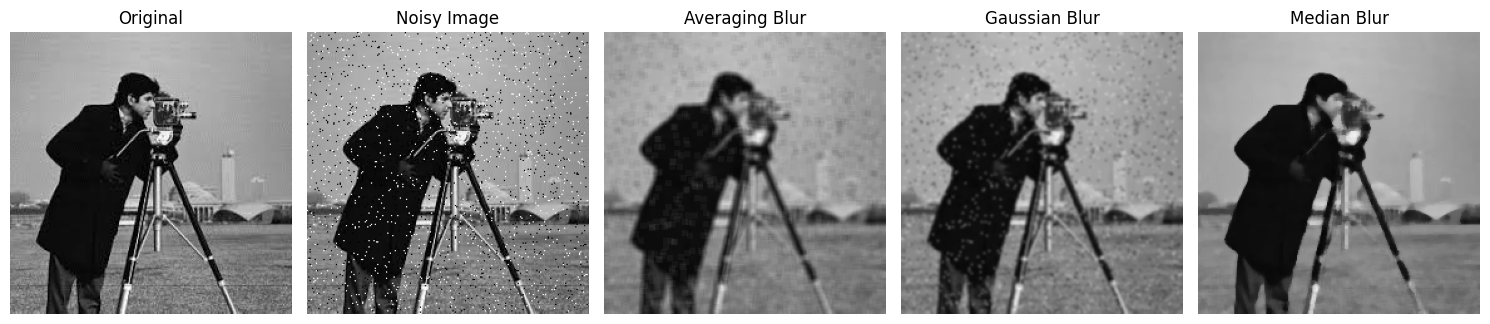

In [ ]:
titles = ['Original', 'Noisy Image', 'Averaging Blur', 'Gaussian Blur', 'Median Blur']
images = [image, noisy_image, avg_blur, gauss_blur, median_blur]

plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Add gaussian noise and then compare blurring filters

Perfect! Let’s now:

✅ Add **Gaussian noise** (random values from a normal distribution)  
✅ Apply the **same three smoothing filters**  
✅ Compare their effectiveness visually  

---

## 🧪 Step 1: Add Gaussian Noise

```python
def add_gaussian_noise(image, mean=0, sigma=25):
    """
    Adds Gaussian noise to an image.

    Parameters:
    - image: Input image (uint8)
    - mean: Mean of the Gaussian distribution
    - sigma: Standard deviation

    Returns:
    - noisy_image: Image with Gaussian noise added
    """
    gaussian = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + gaussian
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image
```

---

## 🎨 Step 2: Apply Filters to the Noisy Image

```python
# Add Gaussian noise
noisy_image = add_gaussian_noise(image)

# Apply filters
avg_blur = cv2.blur(noisy_image, (5, 5))
gauss_blur = cv2.GaussianBlur(noisy_image, (5, 5), 0)
median_blur = cv2.medianBlur(noisy_image, 5)
```

---

## 📊 Step 3: Compare Results Visually

```python
titles = ['Original', 'Gaussian Noise', 'Averaging Blur', 'Gaussian Blur', 'Median Blur']
images = [image, noisy_image, avg_blur, gauss_blur, median_blur]

plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
```

---

## 🔍 Interpretation:

| Filter         | Gaussian Noise Handling | Notes |
|----------------|--------------------------|-------|
| **Averaging**  | ❌ Blurs noise & details  | Simple, fast, but weak |
| **Gaussian**   | ✅ Best suited            | Matches noise distribution |
| **Median**     | ⚠️ Decent, not optimal     | Good for impulse noise (salt & pepper), not Gaussian |

---



In [ ]:
def add_gaussian_noise(image, mean=0, sigma=25):
    """
    Adds Gaussian noise to an image.

    Parameters:
    - image: Input image (uint8)
    - mean: Mean of the Gaussian distribution
    - sigma: Standard deviation

    Returns:
    - noisy_image: Image with Gaussian noise added
    """
    gaussian = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + gaussian
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image


In [ ]:
# Add Gaussian noise
noisy_image = add_gaussian_noise(image)

# Apply filters
avg_blur = cv2.blur(noisy_image, (5, 5))
gauss_blur = cv2.GaussianBlur(noisy_image, (5, 5), 0)
median_blur = cv2.medianBlur(noisy_image, 5)


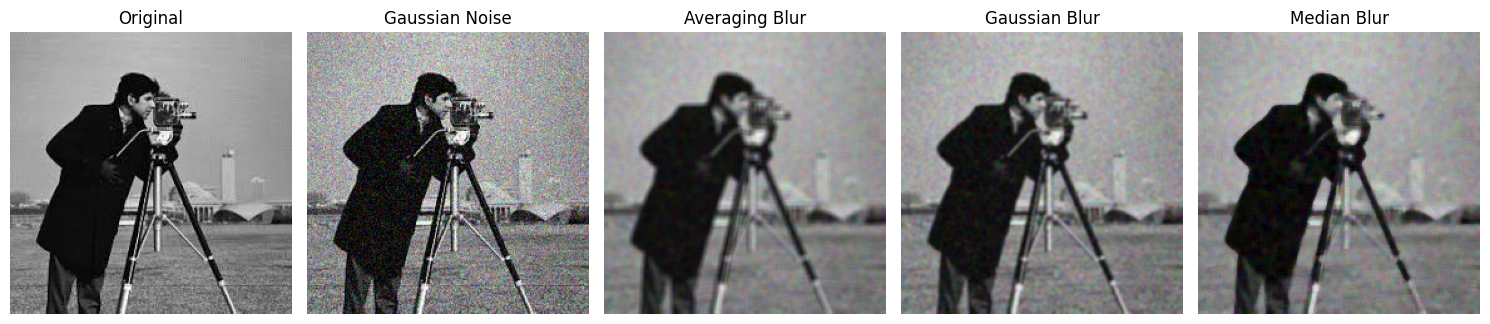

In [ ]:
titles = ['Original', 'Gaussian Noise', 'Averaging Blur', 'Gaussian Blur', 'Median Blur']
images = [image, noisy_image, avg_blur, gauss_blur, median_blur]

plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
